Pet Classification Model Using CNN.


In [490]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator, load_img

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [365]:
datagen = ImageDataGenerator(
                        rescale=1./225,
                        rotation_range = 20,
                        shear_range=0.40,
                        zoom_range=0.30,
                        horizontal_flip=True,
                        vertical_flip=True,
                        height_shift_range=0.1,
                        )

In [366]:
image_width = 200
image_height = 200
image_size = (image_height*image_width)

Generating Images for cat Training Data

In [501]:
path_train_cat = os.listdir('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/train_cat')

In [502]:
tarin_cat_dir = r'C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/train_cat'

In [503]:
for i in path_train_cat:
    #sample = random.choice(path_train_cat)
    image = load_img('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/train_cat/'+i)
    arr = img_to_array(image)
    arr = arr.reshape((1,)+arr.shape)
    
    i = 0

    for batch in datagen.flow(arr,batch_size=15,
                         save_to_dir = tarin_cat_dir,
                         save_prefix='image', save_format ='jpeg'):
        i += 1 
        if i >10:
            break
    
    

Generating Images for cat Testing data

In [504]:
path_test_cat = os.listdir('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/test_cat')

In [505]:
test_cat_dir = r'C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/test_cat'

In [506]:
for i in path_test_cat:
    #sample = random.choice(path_train_cat)
    image = load_img('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/test_cat/'+i)
    arr = img_to_array(image)
    arr = arr.reshape((1,)+arr.shape)
    
    i = 0

    for batch in datagen.flow(arr,batch_size=15,
                         save_to_dir = test_cat_dir,
                         save_prefix='image', save_format ='jpeg'):
        i += 1 
        if i >20:
            break
    
    

Generating Images for Dog Testing data

In [507]:
path_test_dog = os.listdir('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/test_dog')

In [508]:
test_dog_dir = r'C:\Users\Kiran Shankar Bhat\Documents\Jupyter Code\Deep l\image\test_dog'

In [509]:
for i in path_test_dog:
    #sample = random.choice(path_train_cat)
    image = load_img('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/test_dog/'+i)
    arr = img_to_array(image)
    arr = arr.reshape((1,)+arr.shape)
    
    i = 0

    for batch in datagen.flow(arr,batch_size=15,
                              
                             save_to_dir = test_dog_dir,
                             save_prefix='image', save_format ='jpeg'):
        i += 1 
        if i >20:
            break
    
    

Generating Images for Dog Training data

In [510]:
path_train_dog = os.listdir('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/train_dog')

In [511]:
train_dog_dir = r'C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/train_dog'

In [512]:
for i in path_train_dog:
    #sample = random.choice(path_train_cat)
    image = load_img('C:/Users/Kiran Shankar Bhat/Documents/Jupyter Code/Deep l/image/train_dog/'+i)
    arr = img_to_array(image)
    arr = arr.reshape((1,)+arr.shape)
    
    i = 0

    for batch in datagen.flow(arr,batch_size=15,
                              
                              save_to_dir = train_dog_dir,
                              save_prefix='image', save_format ='jpeg'):
        i += 1 
        if i >10:
            break
    
    

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [513]:
import cv2

In [514]:
train_directory = r'C:\Users\Kiran Shankar Bhat\Documents\Jupyter Code\Deep l\image'
train_categories =['train_cat','train_dog'] 

In [515]:
data = []

for category in train_categories :
    folder = os.path.join(train_directory, category)
    lables = train_categories.index(category)
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_array = cv2.imread(img_path)
        img_array = cv2.resize(img_array,(image_height,image_width))

        data.append([img_array,lables])

In [516]:
len(data)

476

In [517]:
random.shuffle(data)

In [518]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

In [519]:
X = np.array(x)
Y = np.array(y)

In [520]:
x_train = np.array(x)
y_train = np.array(y)

1


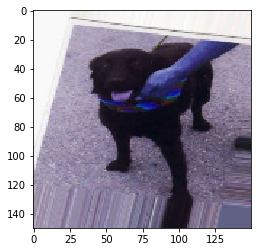

In [521]:
plt.imshow(x_train[5])
print (y_train[5])

1


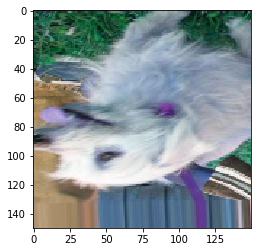

In [522]:
plt.imshow(x_train[12])
print (y_train[12])

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=30)

In [523]:
test_directory = r'C:\Users\Kiran Shankar Bhat\Documents\Jupyter Code\Deep l\image'
test_categories = ['test_cat','test_dog']

In [524]:
dat = []

for category in test_categories:
    folder = os.path.join(test_directory,category)
    label = test_categories.index(category)
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_array = cv2.imread(img_path)
        img_array = cv2.resize(img_array,(image_width,image_height))
        dat.append([img_array,label])
        

In [525]:
print (len(dat))
random.shuffle(dat)

432


In [526]:
x =[]
y = []
for features,lable in dat:
    x.append(features)
    y.append(lable)

In [527]:
x_test = np.array(x)
y_test = np.array(y)

0


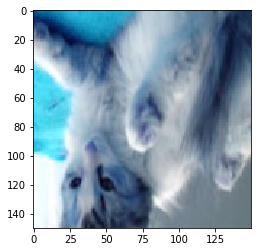

In [528]:
plt.imshow(x_test[0])
print (y_test[0])

1


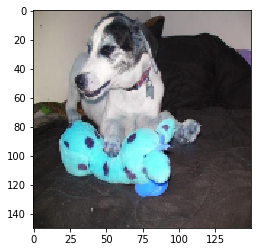

In [529]:
plt.imshow(x_test[1])
print (y_test[1])

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [530]:
image_width = 150
image_height = 150
image_size = (image_height*image_width)

In [531]:
x_test.shape

(432, 150, 150, 3)

In [532]:
model = tf.keras.models.Sequential()

In [533]:
model.add(tf.keras.layers.Conv2D(32,(5,5), input_shape = (150,150,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2)))

In [534]:
model.add(tf.keras.layers.Conv2D(64,(5,5), input_shape = (150,150,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2),strides=(2,2)))

In [535]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

In [547]:
model.add(tf.keras.layers.Dense(2,activation = 'softmax'))

In [556]:
optim = tf.keras.optimizers.RMSprop (lr = 0.01)
model.compile(loss='binary_crossentropy', optimizer=optim , metrics=['accuracy'])

In [557]:
model.fit(x_train,y_train,
         validation_data=(x_test,y_test),
         epochs=100,
          batch_size=20
         
         )

Epoch 1/100
24/24 [==============================] - 29s 1s/step - loss: 0.6932 - accuracy: 0.5504 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 2/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.4916 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 3/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 4/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5210 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 5/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5210 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 6/100
24/24 [==============================] - 29s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 7/100
24/24 [==============================] - 29s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 8/100
2

Epoch 59/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.4664 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 60/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5168 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 61/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5336 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 62/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 63/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 64/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.4874 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 65/100
24/24 [==============================] - 28s 1s/step - loss: 0.6932 - accuracy: 0.5210 - val_loss: 0.6932 - val_accuracy: 0.5208
Epoch 

In [558]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
batch_normalization_77 (Batc (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
batch_normalization_78 (Batc (None, 69, 69, 64)        256       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 73984)           

In [559]:
model.fit(x_train,y_train,
         validation_data=(x_test,y_test),
         epochs=200,
          batch_size=20
         
         )

Epoch 1/200
24/24 [==============================] - 32s 1s/step - loss: 0.6932 - accuracy: 0.5168 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 2/200
24/24 [==============================] - 31s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 3/200
24/24 [==============================] - 35s 1s/step - loss: 0.6932 - accuracy: 0.4706 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 4/200
24/24 [==============================] - 32s 1s/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 5/200
24/24 [==============================] - 32s 1s/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 6/200
24/24 [==============================] - 31s 1s/step - loss: 0.6932 - accuracy: 0.5378 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 7/200
24/24 [==============================] - 31s 1s/step - loss: 0.6932 - accuracy: 0.4874 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 8/200
2

KeyboardInterrupt: 